# Use Feedforward Neural Network/ ConvolutionalNN for the MNIST dataset:
* [Prepare data set](#1)
* [FNN with one hidden layer](#2)
* [FNN with two hidden layer](#3)
* [Simple CNN](#4)
* [More complex CNN](#5)

## Prepare the data set <a class="anchor" id="1"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import tensorflow as tf
mnist = tf.keras.datasets.mnist
from tensorflow import keras

In [2]:
def create_data_sets(n_train, n_test):

    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train, x_test = x_train/255, x_test/255
    
    x = np.concatenate((x_train, x_test))
    y = np.concatenate((y_train, y_test))
    
    permutation = np.random.permutation(x.shape[0])
    x = x[permutation]
    y = y[permutation]
    
    return train_test_split(x, y, train_size=n_train, test_size=n_test)

shape of train set (10000, 28, 28), (10000,)
shape of test set (2000, 28, 28), (2000,)


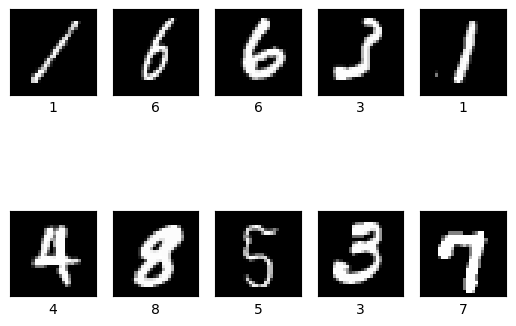

In [3]:
# create and inspect the data sets
n_train, n_test = 10**4, 2*10**3
x_train, x_test, y_train, y_test = create_data_sets(n_train, n_test)

print(f'shape of train set {x_train.shape}, {y_train.shape}')
print(f'shape of test set {x_test.shape}, {y_test.shape}')

# plot some training examples
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i],
               cmap= 'gray'
               )
    plt.xlabel(f'{y_train[i]}')
    plt.xticks(())
    plt.yticks(())

In [4]:
# embed the data from 28x28 pixels to 50x50 pixels by randomly placing the image

def embedding(img, l_original = 28,  l_embed = 50):

    # pick two random integers to represent the position of the top left pixel of the image
    pos_x, pos_y = np.random.randint(l_embed-l_original, size=2) 
    embed_img = np.zeros((l_embed, l_embed))
    embed_img[pos_x:pos_x+l_original, pos_y:pos_y+l_original] = img
    

    return embed_img

shape of the embedded training set (10000, 50, 50)
shape of the embedded test set (2000, 50, 50)


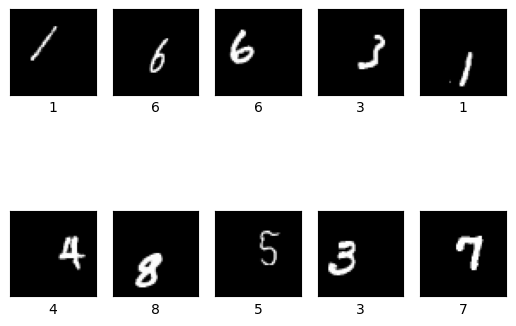

In [5]:
x_train_embedded = np.array([embedding(img) for img in x_train])
x_test_embedded = np.array([embedding(img) for img in x_test])
print(f'shape of the embedded training set {x_train_embedded.shape}')
print(f'shape of the embedded test set {x_test_embedded.shape}')

# plot some embedded training examples
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train_embedded[i],
               cmap= 'gray'
               )
    plt.xlabel(f'{y_train[i]}')
    plt.xticks(())
    plt.yticks(())

In [6]:
# reshape the data appropreatly

# each training example to be 1-dim
x_train_embedded_one_dim = x_train_embedded.reshape(x_train_embedded.shape[0], -1)
x_test_embedded_one_dim = x_test_embedded.reshape(x_test_embedded.shape[0], -1)
print(f'shape of 1-dim train set {x_train_embedded_one_dim.shape}, labels {y_train.shape}')
print(f'shape of 1-dim train set {x_test_embedded_one_dim.shape}, labels {y_test.shape}')

# each training example to be 3-dim, i.e. n x n x n_c
x_train_embedded_3dim = np.expand_dims(x_train_embedded, axis=3)
x_test_embedded_3dim = np.expand_dims(x_test_embedded, axis=3)
print(f'shape of 3-dim train set {x_train_embedded_3dim.shape}, labels {y_train.shape}')
print(f'shape of 3-dim train set {x_test_embedded_3dim.shape}, labels {y_test.shape}')

shape of 1-dim train set (10000, 2500), labels (10000,)
shape of 1-dim train set (2000, 2500), labels (2000,)
shape of 3-dim train set (10000, 50, 50, 1), labels (10000,)
shape of 3-dim train set (2000, 50, 50, 1), labels (2000,)


## 2. Use a Feedforward neural network with just one hidden layer <a class="anchor" id="2"></a>

In [7]:
l_embed = 50
n_units = 250
model_FNN_one_hidden = keras.Sequential()
model_FNN_one_hidden.add(keras.Input(shape=(l_embed**2,)))
model_FNN_one_hidden.add(keras.layers.Dense(n_units, activation='relu', name = 'hidden'))
model_FNN_one_hidden.add(keras.layers.Dense(10, activation='linear', name = 'output'))
model_FNN_one_hidden.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden (Dense)                  │ (None, 250)            │       625,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         2,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 627,760 (2.39 MB)

 Trainable params: 627,760 (2.39 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model_FNN_one_hidden.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                             optimizer = keras.optimizers.Adam(),
                             metrics = ['accuracy']
                             )

In [9]:
histoty_fnn_simple = model_FNN_one_hidden.fit(x_train_embedded_one_dim, 
                         y_train,
                         batch_size = 128,
                         validation_data = (x_test_embedded_one_dim, y_test),
                         epochs = 30,
                         verbose = 0
                         )

In [10]:
model_FNN_one_hidden.evaluate(x_train_embedded_one_dim, y_train)
model_FNN_one_hidden.evaluate(x_test_embedded_one_dim, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0072
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7862 - loss: 0.8151


[0.7765718698501587, 0.7889999747276306]

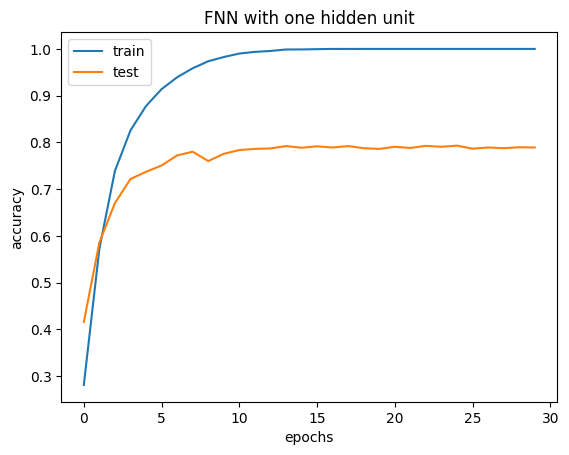

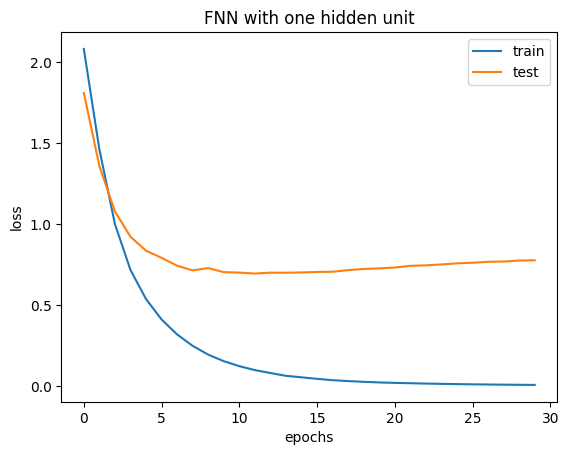

In [11]:
plt.plot(histoty_fnn_simple.history['accuracy'], label = 'train')
plt.plot(histoty_fnn_simple.history['val_accuracy'], label = 'test')
plt.title('FNN with one hidden unit')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.plot(histoty_fnn_simple.history['loss'], label = 'train')
plt.plot(histoty_fnn_simple.history['val_loss'], label = 'test')
plt.title('FNN with one hidden unit')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

The model clearly overfits the data, bias is 0 but variance is high.
Need to add some regularization.

In [12]:
n_units = 250
model_FNN_one_hidden_reg = keras.Sequential()
model_FNN_one_hidden_reg.add(keras.Input(shape=(l_embed**2,)))
model_FNN_one_hidden_reg.add(keras.layers.Dense(n_units, activation='relu', 
                                                kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4) ,
                                                name = 'hidden')
                             )
model_FNN_one_hidden_reg.add(keras.layers.Dropout(rate=0.2))
model_FNN_one_hidden_reg.add(keras.layers.Dense(10, activation='linear', name = 'output'))
model_FNN_one_hidden_reg.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden (Dense)                  │ (None, 250)            │       625,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         2,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 627,760 (2.39 MB)

 Trainable params: 627,760 (2.39 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model_FNN_one_hidden_reg.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                             optimizer = keras.optimizers.Adam(),
                             metrics = ['accuracy']
                             )

In [14]:
histoty_fnn_simple_reg = model_FNN_one_hidden_reg.fit(x_train_embedded_one_dim, 
                         y_train,
                         batch_size = 128,
                         validation_data = (x_test_embedded_one_dim, y_test),
                         epochs = 30,
                         verbose = 0
                         )

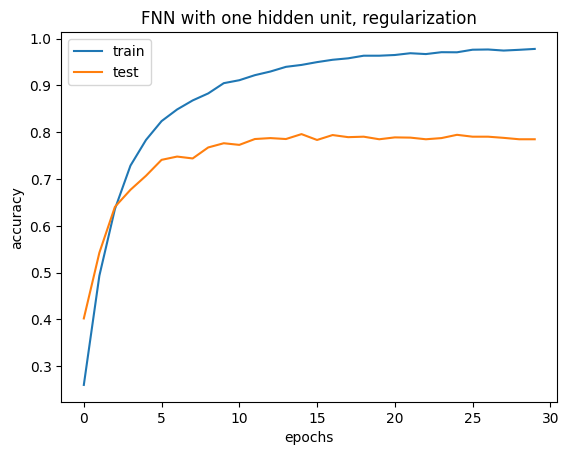

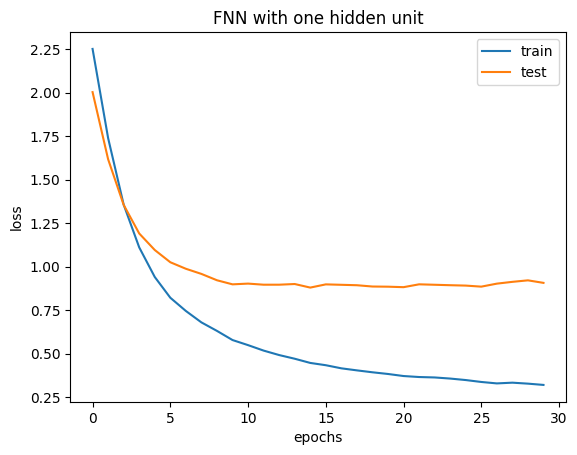

In [15]:
plt.plot(histoty_fnn_simple_reg.history['accuracy'], label = 'train')
plt.plot(histoty_fnn_simple_reg.history['val_accuracy'], label = 'test')
plt.title('FNN with one hidden unit, regularization')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.plot(histoty_fnn_simple_reg.history['loss'], label = 'train')
plt.plot(histoty_fnn_simple_reg.history['val_loss'], label = 'test')
plt.title('FNN with one hidden unit')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## 3. FNN with two hidden layers <a class="anchor" id="3"></a>

In [16]:
n_units1, n_units2 = 250, 150
model_FNN_two_hidden_reg = keras.Sequential()
model_FNN_two_hidden_reg.add(keras.Input(shape=(l_embed**2,)))
model_FNN_two_hidden_reg.add(keras.layers.Dense(n_units1, activation='relu', 
                                                kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4) ,
                                                )
                             )
model_FNN_two_hidden_reg.add(keras.layers.Dense(n_units2, activation='relu', 
                                                kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4) ,
                                                )
                             )
model_FNN_two_hidden_reg.add(keras.layers.Dense(10, activation='linear', name = 'output'))
model_FNN_two_hidden_reg.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 250)            │       625,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        37,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 664,410 (2.53 MB)

 Trainable params: 664,410 (2.53 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model_FNN_two_hidden_reg.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                             optimizer = keras.optimizers.Adam(),
                             metrics = ['accuracy']
                             )

In [18]:
histoty_fnn_two_reg = model_FNN_two_hidden_reg.fit(x_train_embedded_one_dim, 
                         y_train,
                         batch_size = 128,
                         validation_data = (x_test_embedded_one_dim, y_test),
                         epochs = 30,
                         verbose = 0
                         )

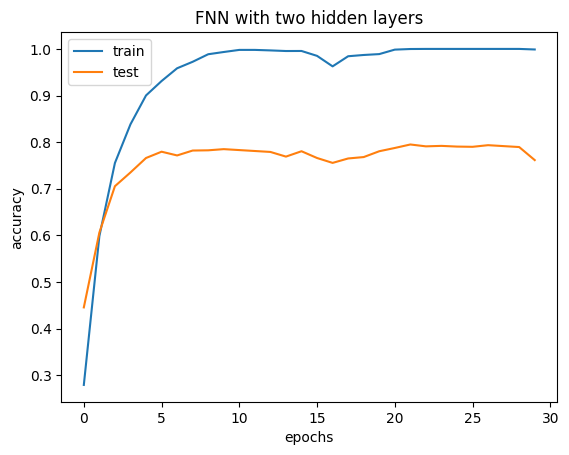

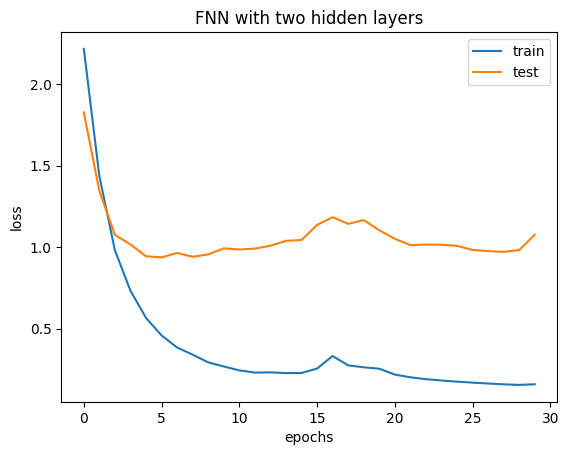

In [19]:
plt.plot(histoty_fnn_two_reg.history['accuracy'], label = 'train')
plt.plot(histoty_fnn_two_reg.history['val_accuracy'], label = 'test')
plt.title('FNN with two hidden layers')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.plot(histoty_fnn_two_reg.history['loss'], label = 'train')
plt.plot(histoty_fnn_two_reg.history['val_loss'], label = 'test')
plt.title('FNN with two hidden layers')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## 4. Use a simple convolutional network <a class="anchor" id="4"></a>

In [20]:
model_CNN_simple = keras.Sequential()

# now input shape is of the form of an image, i.e. (n_H, n_W, n_C)
# in out case we have only one channel
model_CNN_simple.add(keras.Input(shape=(l_embed, l_embed, 1)))

# add one Convolutinal NN, followed by a MaxPooling layer; repeat it twice
model_CNN_simple.add(keras.layers.Conv2D(kernel_size=(3, 3), filters=8, activation='relu')
                             )
model_CNN_simple.add(keras.layers.MaxPooling2D(pool_size=(2, 2), ))

model_CNN_simple.add(keras.layers.Conv2D(kernel_size=(3, 3), filters=16, activation='relu')
                             )
model_CNN_simple.add(keras.layers.MaxPooling2D(pool_size=(2, 2), ))

# flatten the output to apply Dense layers
model_CNN_simple.add(keras.layers.Flatten())

model_CNN_simple.add(keras.layers.Dense(200, activation='relu',))

model_CNN_simple.add(keras.layers.Dense(10, activation='linear', name = 'output'))

model_CNN_simple.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1936)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 200)            │       387,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 390,658 (1.49 MB)

 Trainable params: 390,658 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model_CNN_simple.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                             optimizer = keras.optimizers.Adam(),
                             metrics= ['accuracy']
                             )

In [22]:
history_conv_simple = model_CNN_simple.fit(x_train_embedded_3dim, 
                         y_train,
                         batch_size = 128,
                         validation_data = (x_test_embedded_3dim, y_test),
                         epochs = 30,
                         verbose = 1
                         )

Epoch 1/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.2283 - loss: 2.1193 - val_accuracy: 0.6345 - val_loss: 1.1133
Epoch 2/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.7083 - loss: 0.9136 - val_accuracy: 0.7850 - val_loss: 0.6491
Epoch 3/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8473 - loss: 0.5030 - val_accuracy: 0.8435 - val_loss: 0.4657
Epoch 4/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.8914 - loss: 0.3691 - val_accuracy: 0.8830 - val_loss: 0.3775
Epoch 5/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9280 - loss: 0.2519 - val_accuracy: 0.8920 - val_loss: 0.3563
Epoch 6/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9456 - loss: 0.1929 - val_accuracy: 0.8950 - val_loss: 0.3539
Epoch 7/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9633 - loss: 0.1298 - val_accuracy: 0.8965 - val_loss: 0.3272
Epoch 8/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.9718 - loss: 0.0982 - val_accuracy: 0.8980 - v

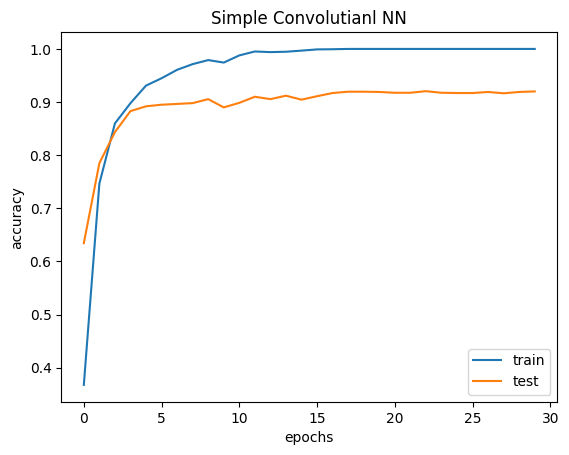

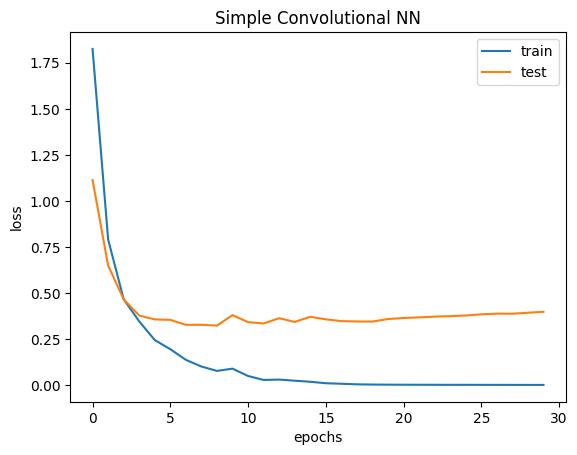

In [23]:
plt.plot(history_conv_simple.history['accuracy'], label = 'train')
plt.plot(history_conv_simple.history['val_accuracy'], label = 'test')
plt.title('Simple Convolutianl NN')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.plot(history_conv_simple.history['loss'], label = 'train')
plt.plot(history_conv_simple.history['val_loss'], label = 'test')
plt.title('Simple Convolutional NN')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Accuracy clearly improves, but the model clearly overfits the data, sinve we didn't add any regularization. We will now add some BatchNormalization layer, Dropout layers and regularizers.

## 5. Use a more complex CNN, add normalization <a class="anchor" id="5"></a>

In [24]:
model_CNN_complex = keras.Sequential()

# now input shape is of the form of an image, i.e. (n_H, n_W, n_C)
# in out case we have only one channel
model_CNN_complex.add(keras.Input(shape=(l_embed, l_embed, 1)))

# add one Convolutinal NN with no activation, 
# followed by a Batch Normalization on the outputs, then an activation
# followed by a MaxPooling layer; 
# repeat it 

# first set of ConvLayer, BatchNormalization, MaxPool
model_CNN_complex.add(keras.layers.Conv2D(kernel_size=(6, 6), filters=32, activation='linear')
                             )
model_CNN_complex.add(keras.layers.BatchNormalization())
model_CNN_complex.add(keras.layers.ReLU())
model_CNN_complex.add(keras.layers.MaxPooling2D(pool_size=(2, 2), ))

# second set of ConvLayer, BatchNormalization, MaxPool
model_CNN_complex.add(keras.layers.Conv2D(kernel_size=(4, 4), filters=64, activation='linear')
                             )
model_CNN_complex.add(keras.layers.BatchNormalization())
model_CNN_complex.add(keras.layers.ReLU())
model_CNN_complex.add(keras.layers.MaxPooling2D(pool_size=(2, 2), ))

# third set of ConvLayer, BatchNormalization, MaxPool
model_CNN_complex.add(keras.layers.Conv2D(kernel_size=(3, 3), filters=128, activation='linear')
                             )
model_CNN_complex.add(keras.layers.BatchNormalization())
model_CNN_complex.add(keras.layers.ReLU())
model_CNN_complex.add(keras.layers.MaxPooling2D(pool_size=(2, 2), ))

# flatten the output to apply Dense layers
model_CNN_complex.add(keras.layers.Flatten())

model_CNN_complex.add(keras.layers.Dense(264, activation='relu',
                                         kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4)
                                         )
                      )

model_CNN_complex.add(keras.layers.Dense(10, activation='linear', name = 'output'))

model_CNN_complex.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 32)     │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 45, 45, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 19, 19, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 19, 19, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 19, 19, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 264)            │       304,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         2,650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 415,810 (1.59 MB)

 Trainable params: 415,362 (1.58 MB)

 Non-trainable params: 448 (1.75 KB)

In [25]:
model_CNN_complex.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                             optimizer = keras.optimizers.Adam(),
                             metrics= ['accuracy']
                             )

In [26]:
history_conv_complex = model_CNN_complex.fit(x_train_embedded_3dim, 
                         y_train,
                         batch_size = 128,
                         validation_data = (x_test_embedded_3dim, y_test),
                         epochs = 30,
                         verbose = 1
                         )

Epoch 1/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 39s 445ms/step - accuracy: 0.3150 - loss: 2.3154 - val_accuracy: 0.1105 - val_loss: 4.1950
Epoch 2/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 35s 440ms/step - accuracy: 0.8317 - loss: 0.6806 - val_accuracy: 0.1105 - val_loss: 5.2380
Epoch 3/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 40s 423ms/step - accuracy: 0.9236 - loss: 0.3926 - val_accuracy: 0.1105 - val_loss: 5.3666
Epoch 4/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 422ms/step - accuracy: 0.9576 - loss: 0.2698 - val_accuracy: 0.1105 - val_loss: 5.4100
Epoch 5/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 422ms/step - accuracy: 0.9741 - loss: 0.2061 - val_accuracy: 0.1770 - val_loss: 3.7619
Epoch 6/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 34s 431ms/step - accuracy: 0.9825 - loss: 0.1758 - val_accuracy: 0.3635 - val_loss: 2.4167
Epoch 7/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 34s 428ms/step - accuracy: 0.9890 - loss: 0.1511 - val_accuracy: 0.9190 - val_loss: 0.3529
Epoch 8/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 34s 428ms/step - accuracy: 0.9904 - loss: 0.1439 - val_accu

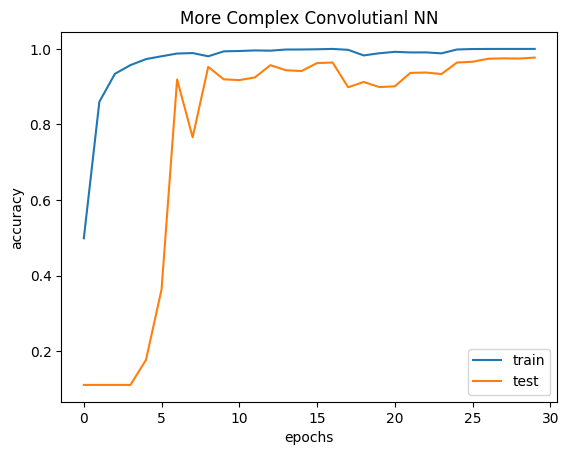

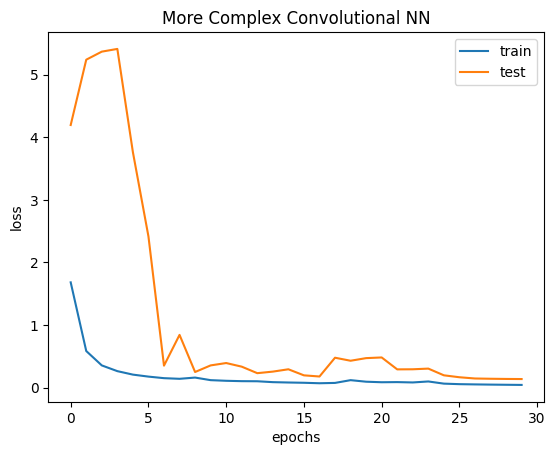

In [27]:
plt.plot(history_conv_complex.history['accuracy'], label = 'train')
plt.plot(history_conv_complex.history['val_accuracy'], label = 'test')
plt.title('More Complex Convolutianl NN')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.plot(history_conv_complex.history['loss'], label = 'train')
plt.plot(history_conv_complex.history['val_loss'], label = 'test')
plt.title('More Complex Convolutional NN')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

This takes a while to train but the results are the best by far.

In [28]:
# save the last most succesful model
model_CNN_complex.save('my_CNN_MNIST.keras')